In [116]:
import os
import sys
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print ("Welcome to the project")
# http://www.certainly-strange.com/?p=968

Welcome to the project


In [153]:
# Load google timeline data
#locationData = "/Users/andybartle/Dropbox/GIS_database_projects/Google-timeline-extract-20180928/LocationHistory/LocationHistory.json"
locationData = "trial-data.json"
with open(locationData) as data_file:
    data = json.load(data_file)
    df = pd.DataFrame.from_dict(data['locations'])

# View data
df.head(5)

,accuracy,activity,altitude,latitudeE7,longitudeE7,timestampMs,verticalAccuracy
0,15,NaN,1091,459175399,68675439,1538133408059,8
1,15,NaN,1091,459175399,68675439,1538132401032,8
2,15,"[{'timestampMs': '1538131547878', 'activity': ...",1091,459175399,68675439,1538131590095,8
3,15,"[{'timestampMs': '1538131122529', 'activity': ...",1091,459175399,68675439,1538130990064,8
4,15,NaN,1091,459175399,68675439,1538130095091,8


In [154]:
# Tidy data
# get rid of surplus columns
df = tl.drop(['activity', 'altitude', 'verticalAccuracy'], axis=1)
df.head(5)

,accuracy,latitudeE7,longitudeE7,timestampMs
0,15,459175399,68675439,1538133408059
1,15,459175399,68675439,1538132401032
2,15,459175399,68675439,1538131590095
3,15,459175399,68675439,1538130990064
4,15,459175399,68675439,1538130095091


In [155]:
# Covert lat and long from E7 (/1e7)
df.loc[:, 'latitudeE7'] = df['latitudeE7'] / 1e7
df.loc[:, 'longitudeE7'] = df['longitudeE7'] / 1e7
# Convert posix milliseconds to date and time 

df.head(5)
print(df)

    accuracy  latitudeE7  longitudeE7    timestampMs
0         15   45.917540     6.867544  1538133408059
1         15   45.917540     6.867544  1538132401032
2         15   45.917540     6.867544  1538131590095
3         15   45.917540     6.867544  1538130990064
4         15   45.917540     6.867544  1538130095091
5         16   45.917538     6.867535  1538130067539
6         16   45.917535     6.867562  1538129609065
7         16   45.917535     6.867562  1538128989082
8         16   45.917535     6.867562  1538128372737
9         16   45.917535     6.867562  1538127869079
10        13   45.917530     6.867561  1538127245855
11        13   45.917533     6.867569  1538126739105
12        13   45.917545     6.867552  1538126118447
13        13   45.917545     6.867552  1538125515618
14        13   45.917506     6.867580  1538125195108
15        13   45.917506     6.867580  1538124540689
16        14   45.917544     6.867553  1538124494158
17        13   45.917465     6.867589  1538124

In [152]:
datetime.datetime.fromtimestamp(1538133408059/1000.0)

for i, row in df.iteritems():
    df.at['timestampMs', i] = 2

print(df)

             accuracy  latitudeE7  longitudeE7    timestampMs  ifor
0                15.0   45.917540     6.867544  1538133408059   NaN
1                15.0   45.917540     6.867544  1538132401032   NaN
2                15.0   45.917540     6.867544  1538131590095   NaN
3                15.0   45.917540     6.867544  1538130990064   NaN
4                15.0   45.917540     6.867544  1538130095091   NaN
5                16.0   45.917538     6.867535  1538130067539   NaN
6                16.0   45.917535     6.867562  1538129609065   NaN
7                16.0   45.917535     6.867562  1538128989082   NaN
8                16.0   45.917535     6.867562  1538128372737   NaN
9                16.0   45.917535     6.867562  1538127869079   NaN
10               13.0   45.917530     6.867561  1538127245855   NaN
11               13.0   45.917533     6.867569  1538126739105   NaN
12               13.0   45.917545     6.867552  1538126118447   NaN
13               13.0   45.917545     6.867552  

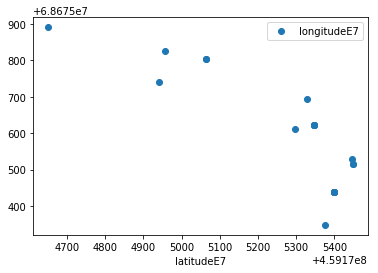

In [151]:
# Plot data
tl.plot(x='latitudeE7', y='longitudeE7', style='o')

In [59]:
pd.__version__

'0.22.0'

In [73]:


for result in data['locations']:
    timestamp = result['timestampMs']
    latitude = result['latitudeE7']
    longitude = result['longitudeE7']
    accuracy = result['accuracy']
    